In [26]:
'''
REFERENCES
1. https://thispointer.com/how-to-save-numpy-array-to-a-csv-file-using-numpy-savetxt-in-python/
2. https://stackoverflow.com/questions/54361557/appending-to-file-using-savetxt/54361619
3. https://www.kaggle.com/pierrek20/multiclass-iris-prediction-with-tensorflow-keras
4. https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
5. https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
'''

'\nREFERENCES\n1. https://thispointer.com/how-to-save-numpy-array-to-a-csv-file-using-numpy-savetxt-in-python/\n2. https://stackoverflow.com/questions/54361557/appending-to-file-using-savetxt/54361619\n3. https://www.kaggle.com/pierrek20/multiclass-iris-prediction-with-tensorflow-keras\n4. https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers\n5. https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix\n'

# VIBE YOGA POSE ESTIMATION

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [29]:
from keras.models import Sequential
from keras.layers import Dense

### Read Training Data

In [30]:
input_df = pd.read_csv('./Datasets/training_data_3d_joints.csv', header=None, sep=' ')
input_df.head()

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,-0.067365,-0.841839,-0.277034,-0.066560,-0.744217,-0.095676,-0.237887,-0.680133,-0.040026,-0.466865,...,-0.098003,-0.882884,-0.240226,0.013323,-0.864786,-0.152407,-0.135449,-0.866718,-0.141739,10
1,-0.066804,-0.838090,-0.276292,-0.065783,-0.743840,-0.093549,-0.236406,-0.680317,-0.036085,-0.463347,...,-0.097192,-0.880066,-0.240425,0.014179,-0.863576,-0.152486,-0.134390,-0.866332,-0.141480,10
2,-0.071513,-0.835238,-0.275110,-0.067524,-0.743250,-0.091508,-0.236445,-0.680360,-0.031975,-0.461186,...,-0.101402,-0.877672,-0.239381,0.011256,-0.862558,-0.153088,-0.136844,-0.865256,-0.139726,10
3,-0.074013,-0.834658,-0.273729,-0.068007,-0.742925,-0.090150,-0.235991,-0.680870,-0.029764,-0.459809,...,-0.103399,-0.877173,-0.237681,0.010199,-0.861870,-0.152789,-0.137545,-0.864845,-0.137626,10
4,-0.075496,-0.834307,-0.272843,-0.068332,-0.742578,-0.089336,-0.235720,-0.681148,-0.028435,-0.458896,...,-0.104595,-0.876814,-0.236558,0.009530,-0.861242,-0.152473,-0.138005,-0.864373,-0.136294,10


In [31]:
input_df = input_df.round(2)
print('Initial Shape: ', input_df.shape)
input_df.drop_duplicates(inplace=True)
print('Final Shape: ', input_df.shape)

Initial Shape:  (66698, 148)
Final Shape:  (29214, 148)


### Split Features and Label

In [32]:
X, y = input_df.iloc[:, :-1], input_df.iloc[:, [-1]]

### One Hot Encoding on Labels

In [33]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
input_labels_y = np_utils.to_categorical(y)
input_labels_y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Split data for training and testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, input_labels_y, random_state = 0, stratify=y, test_size=0.2)
print("X_train:", X_train.shape, " y_train:", y_train.shape)
print("X_test:", X_test.shape, " y_test:", y_test.shape)

X_train: (23371, 147)  y_train: (23371, 11)
X_test: (5843, 147)  y_test: (5843, 11)


### Generate the CNN model

In [35]:
model = Sequential()
model.add(Dense(8, input_dim = X_train.shape[1] , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(X_train, y_train, epochs = 4, batch_size = 2)

Epoch 1/4
23371/23371 [==============================] - 17s 712us/step - loss: 0.4755 - accuracy: 0.8400
Epoch 2/4
23371/23371 [==============================] - 16s 687us/step - loss: 0.1125 - accuracy: 0.9644
Epoch 3/4
23371/23371 [==============================] - 16s 688us/step - loss: 0.0715 - accuracy: 0.9779
Epoch 4/4
23371/23371 [==============================] - 16s 685us/step - loss: 0.0543 - accuracy: 0.9837


In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 1184      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 11)                121       
Total params: 1,615
Trainable params: 1,615
Non-trainable params: 0
_________________________________________________________________


### Training Results

In [37]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5843/5843 [==============================] - 0s 28us/step

accuracy: 98.94%


In [38]:
scores1 = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores1[1]*100))

23371/23371 [==============================] - 0s 20us/step

accuracy: 98.81%


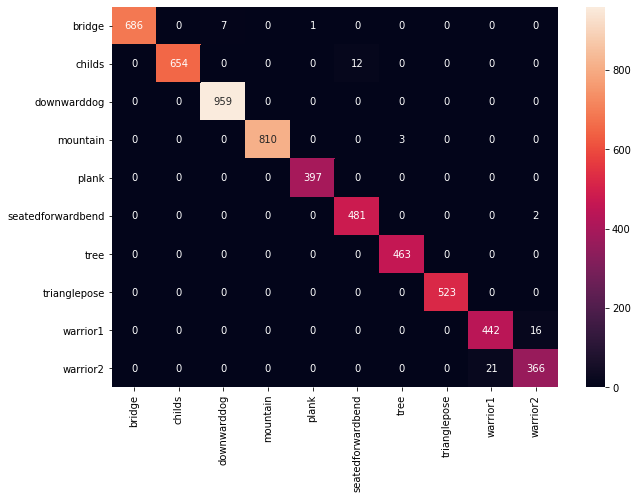

In [39]:
vals = ['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']
y_pred = model.predict_classes(X_test)
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in vals],
                  columns = [i for i in vals])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

### Save the model

In [40]:
import pickle
fileName = "view_classification_model.pkl"
pickle.dump(model, open(fileName, 'wb'))

### Testing model on new dataset

In [41]:
test_df = pd.read_csv('./Datasets/test_data_3d_joints.csv', header=None, sep=' ')
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,0.130631,-0.838264,-0.270695,0.031969,-0.722193,-0.130927,-0.155639,-0.647355,-0.126734,-0.409745,...,0.075375,-0.869855,-0.267065,0.095293,-0.858654,-0.125793,-0.019665,-0.836857,-0.223080,10
1,0.131311,-0.834411,-0.273056,0.031568,-0.721525,-0.131720,-0.156378,-0.646990,-0.125367,-0.410467,...,0.076570,-0.866897,-0.269925,0.096409,-0.857642,-0.128339,-0.019085,-0.836108,-0.225231,10
2,0.129973,-0.832788,-0.274868,0.030479,-0.721291,-0.132289,-0.157243,-0.647254,-0.123629,-0.411503,...,0.075566,-0.865863,-0.271527,0.096363,-0.857156,-0.130037,-0.020040,-0.836281,-0.225822,10
3,0.127865,-0.831996,-0.276454,0.029339,-0.720752,-0.133016,-0.158029,-0.647146,-0.122828,-0.412387,...,0.073524,-0.865157,-0.272738,0.095357,-0.856462,-0.131425,-0.021716,-0.835712,-0.226214,10
4,0.125585,-0.832354,-0.276499,0.028426,-0.720787,-0.132377,-0.158732,-0.647469,-0.120926,-0.413009,...,0.071244,-0.865441,-0.272224,0.094376,-0.856420,-0.131141,-0.023483,-0.835755,-0.224840,10


In [42]:
test_df = test_df.round(3)
print('Initial Shape: ', test_df.shape)
test_df.drop_duplicates(inplace=True)
print('Final Shape: ', test_df.shape)

Initial Shape:  (8499, 148)
Final Shape:  (6986, 148)


In [43]:
X_new, y_new = test_df.iloc[:, :-1], test_df.iloc[:, [-1]]
y_new_encoded = np_utils.to_categorical(y_new)

In [44]:
scores_new_test = model.evaluate(X_new, y_new_encoded)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_new_test[1]*100))

6986/6986 [==============================] - 0s 20us/step

accuracy: 93.66%


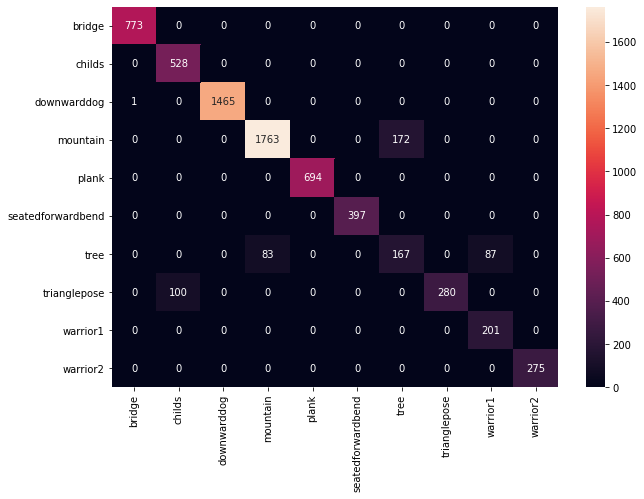

In [45]:
y_test_pred = model.predict_classes(X_new)
cf_matrix_new = confusion_matrix(y_new, y_test_pred)

confusion_df = pd.DataFrame(cf_matrix_new, index = [i for i in vals], columns = [i for i in vals])
plt.figure(figsize = (10,7))
sn.heatmap(confusion_df, annot=True, fmt='g')

### Yoga Pose Estimation of YouTube Video

In [1]:
!python identifyYogaPose.py --vid_file ./InputData/Videos/DownwardDog.mp4

=> loaded pretrained model from 'data/vibe_data/spin_model_checkpoint.pth.tar'
Using TensorFlow backend.
Input video number of frames 272
Running Multi-Person-Tracker
  0%|                                                    | 0/23 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "identifyYogaPose.py", line 333, in <module>
    main(args)
  File "identifyYogaPose.py", line 127, in main
    tracking_results = mot(image_folder)
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/multi_person_tracker/mpt.py", line 194, in __call__
    trackers = self.run_tracker(dataloader)
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/autograd/grad_mode.py", line 49, in decorate_no_grad
    return func(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/multi_person_tracker/mpt.py", line 78, in run_tracker
    predictions = self.detector(batch)
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/autograd/grad_mode.py", line 49, in de